<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 1*

# 📝 Assignment
---

# Decision Trees(결정트리)

## 캐글 인클래스(InClass) Competitions

### 1) 대회 참여(Join) 및 데이터셋 준비

- [캐글 계정을 만드세요](https://www.kaggle.com/), 공유된 인클래스 대회 url을 통해 이동한 후 대회에 참여하세요.
- H1N1 데이터를 훈련/검증/테스트 셋으로 나누어 준비하세요
- **(Urclass Quiz) 훈련데이터셋을 사용해 H1N1 타겟으로 기준모델을 설정하세요. 기준모델의 정확도를 제출하세요.**
    1. 0.24
    2. 0.50
    3. 0.76
    4. 1


In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
# 데이터 불러오기
target = 'vacc_h1n1_f'

train_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train.csv'
label_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/train_labels.csv'
test_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/vacc_flu/test.csv'


train = pd.merge(pd.read_csv(train_url), pd.read_csv(label_url)[target],
                left_index = True, right_index = True)
test = pd.read_csv(test_url)

In [5]:
train, val = train_test_split(train, train_size=.8, random_state=2, stratify=train[target])

# stratify 파라미터는 분류 문제를 다룰 때 매우 중요하게 활용되는 파라미터 값 
# stratify 값으로는 target 값을 지정해주면 된다.
# stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 하게 된다.
# 만약 이 옵션을 지정해주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있다고 한다.

In [6]:
train.shape, val.shape, test.shape

((33723, 39), (8431, 39), (28104, 38))

In [7]:
X_train = train.drop(target, axis=1)
y_train = train[target]

In [8]:
train[target].value_counts(normalize=True)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

In [9]:
# 기준모델 설정 : 분류 문제이므로 최빈값을 기준모델로 하겠음.
from sklearn.metrics import accuracy_score

# 기준모델
baseline = train[target].mode()[0]

# 예측값
pred = [baseline] * len(train[target])

# 기준모델의 정확도. 사실 train[target]의 0 비율을 봐도 되었음..
accuracy_score(y_train, pred)

0.7609346736648578

### 2) 데이터 EDA 및 특성공학 수행
- profiling을 사용하여 데이터를 살펴보고, missing value, zeros, cardinarity 등을 확인하여 처리하세요.
- 본인만의 특성공학을 수행하세요.


In [10]:
pip install category_encoders

In [11]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33723 entries, 20365 to 30904
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26933 non-null  float64
 1   h1n1_knowledge               26933 non-null  float64
 2   behavioral_antiviral_meds    26853 non-null  float64
 3   behavioral_avoidance         26731 non-null  float64
 4   behavioral_face_mask         26913 non-null  float64
 5   behavioral_wash_hands        26894 non-null  float64
 6   behavioral_large_gatherings  26866 non-null  float64
 7   behavioral_outside_home      26851 non-null  float64
 8   behavioral_touch_face        26795 non-null  float64
 9   doctor_recc_h1n1             32235 non-null  float64
 10  doctor_recc_seasonal         32235 non-null  float64
 11  chronic_med_condition        32648 non-null  float64
 12  child_under_6_months         26106 non-null  float64
 13  health_insur

In [13]:
#결측치 확인 -> imputer 사용 예정
train.isnull().sum()

h1n1_concern                    6790
h1n1_knowledge                  6790
behavioral_antiviral_meds       6870
behavioral_avoidance            6992
behavioral_face_mask            6810
behavioral_wash_hands           6829
behavioral_large_gatherings     6857
behavioral_outside_home         6872
behavioral_touch_face           6928
doctor_recc_h1n1                1488
doctor_recc_seasonal            1488
chronic_med_condition           1075
child_under_6_months            7617
health_insurance               15505
health_worker                   7603
opinion_h1n1_vacc_effective     7086
opinion_h1n1_risk               7121
opinion_h1n1_sick_from_vacc     7155
opinion_seas_vacc_effective     7204
opinion_seas_risk               7257
opinion_seas_sick_from_vacc     7310
agegrp                             0
education_comp                  8183
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         8199
r

In [14]:
# 중복 확인 -> 없음.
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [15]:
# target와 상관관계 확인
train.corr().iloc[-1:].T.sort_values(by=target, ascending=False)

,vacc_h1n1_f
vacc_h1n1_f,1.000000
doctor_recc_h1n1,0.400660
doctor_recc_seasonal,0.215975
health_worker,0.171094
h1n1_concern,0.118460
h1n1_knowledge,0.118043
health_insurance,0.111326
behavioral_face_mask,0.075515
household_children,0.074052
behavioral_wash_hands,0.071035


In [16]:
# info 에서는 float가 많았으나, 프로파일링에서는 많지 않은 것으로 확인되므로 float type data 확인
train.select_dtypes('float').head(10).T

# float이나 수치형 자료가 아니라, 범주형임을 알 수 있음 
# 캐글 데이터에서도 확인 가능 

# 모든 이진 변수의 경우: 0 = 아니오; 1 = 예.

# * h1n1_concern - H1N1 독감에 대한 우려 수준입니다.
# * 0 = 전혀 관련되지 않음; 1 = 별로 걱정하지 않음; 2 = 다소 우려됨; 3 = 매우 우려함.

# * h1n1_knowledge - H1N1 독감에 대한 지식 수준입니다.
# * 0 = 지식 없음; 1 = 약간의 지식; 2 = 많은 지식.


,20365,29138,36128,39793,32973,31450,17541,33946,5300,34292
h1n1_concern,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0
h1n1_knowledge,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
behavioral_wash_hands,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
behavioral_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
behavioral_outside_home,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
behavioral_touch_face,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
doctor_recc_h1n1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [17]:
# 프로파일링에서 High cardinality가 확인되므로 범주가 많은 featrue 확인해보기

train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


In [18]:
# feature engineering method

def engineering(df):

  # Delet high cardinality feature
    labels = df.nunique()         # featrue 별로 cardinality 갯수
    selected_features = labels[labels <= 30].index.tolist()    # cardinality 가 30 이하인 feature 이름들만 리스트에 담음
    df = df[selected_features]


  # 새로운 특성 생성
    behaviorals = [col for col in df.columns if 'behavioral' in col]
    df['Total_behave'] = df[behaviorals].sum(axis=1)
    df.drop(columns=behaviorals, inplace=True)
    
  
  # 계절성 백신 관련된 feature와 '고용산업, 고용직업' feature는 큰 영향을 주지 않는다고 판단하여 삭제
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    df.drop(columns=dels, inplace=True)

  # raw data를 살펴보니 feature 중에 n_people_r 은 n_adult_r + household_children 이므로 두 개의 feature는 삭제
    df.drop(columns = ['n_adult_r', 'household_children'], axis=1, inplace=True)

    return df
    

# 데이터에 적용
train = engineering(train)
val = engineering(val)
test = engineering(test)

In [21]:
#columns 확인
train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
       'chronic_med_condition', 'child_under_6_months', 'health_insurance',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'agegrp', 'education_comp', 'raceeth4_i',
       'sex_i', 'inc_pov', 'marital', 'rent_own_r', 'census_region',
       'census_msa', 'n_people_r', 'hhs_region', 'vacc_h1n1_f',
       'Total_behave'],
      dtype='object')

In [22]:
# X, y로 data set split
feature = train.drop(columns=[target]).columns
# target = 'vacc_h1n1_f'

X_train = train[feature]
y_train = train[target]

X_val = val[feature]
y_val = val[target]

X_test = test[feature]


### 3) 모델링 수행
- 결정트리를 학습시킵니다. 하이퍼파라미터를 수정하여 성능을 높여보세요. 과적합을 주의하세요!
- 검증세트 스코어를 확인하세요.(평가지표는 F1-score입니다, 수식은 캐글 Overview-Evaluation 페이지를 확인해 주세요. 평가지표에 대한 내용은 다음에 자세히 배우고 활용할 것입니다 지금은 스코어를 올리기 위한 노력을 전혀 기울이지 말고 결정트리의 개념과 코드이해, 사용에 집중하세요!)
- 특성중요도를 그래프로 나타내 보세요
- **(Urclass Quiz) 검증세트의 F1-score를 제출하세요. (0.5 이상 통과)**

In [46]:
# 파이프라인 사용해서 모델 만들기
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(OneHotEncoder(use_cat_names=True),
                     SimpleImputer(strategy='most_frequent'),
#                     DecisionTreeClassifier(random_state=1, criterion='entropy') ->  결과는 완전히 과적합; 
                     DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1))

# pipe에 train data 학습
pipe.fit(X_train, y_train)

# 정확도
print('train set score :', pipe.score(X_train, y_train))
print('validation set score :', pipe.score(X_val, y_val))

train set score : 0.7994247249651573
validation set score : 0.8054797770134029


In [47]:
from sklearn.metrics import f1_score

pred_train = pipe.predict(X_train)
pred_val = pipe.predict(X_val)

print('train set f1_score :', f1_score(y_train, pred_train))
print('validation set f1_score :', f1_score(y_val, pred_val))

train set f1_score : 0.5681818181818181
validation set f1_score : 0.5866935483870968


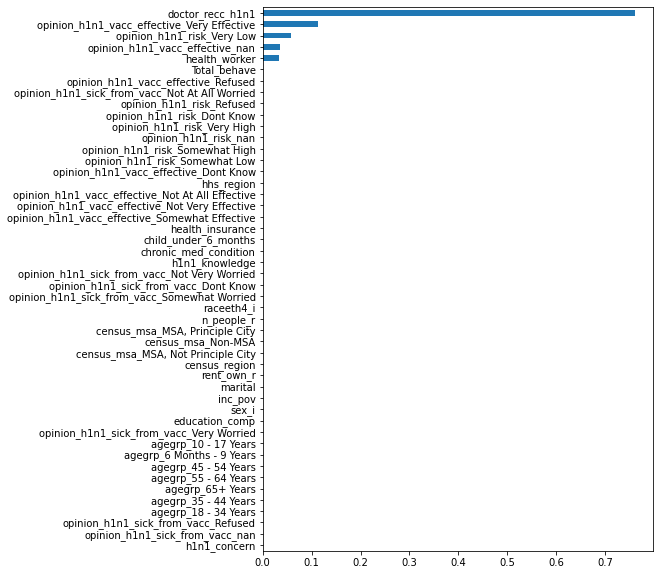

In [72]:
# 특성 중요도 시각화
import matplotlib.pyplot as plt

model_dt = pipe.named_steps['decisiontreeclassifier']
columns = pipe.named_steps['onehotencoder'].transform(X_val).columns

importances = pd.Series(model_dt.feature_importances_, columns)
plt.figure(figsize=(7,10))
importances.sort_values().plot.barh();

### 4) 테스트셋 예측 결과 제출(Submission)

- 테스트셋에 대한 예측 결과를 캐글에 제출 하세요.(스코어가 많이 낮게 나와도 결정트리를 잘 이해하고 결과를 내었다면 충분합니다!)
- **(Urclass Quiz) 캐글 Leaderboard의 본인 Score를 제출하세요.**
 

In [57]:
# test set predict
pred = pipe.predict(X_test)

# submission data와 같은 형태를 만들어 주기 위해 데이터프레임으로 만듬
df_finall = pd.DataFrame(pred, columns=['vacc_h1n1_f'])

In [63]:
df_finall.shape     # row 가 28104 개인 것 확인

(28104, 1)

In [64]:
df_finall.to_csv('submission.csv', index_label='id', header=True)

## 🔥 도전과제(Github - Discussion)

### 4) 2개 이상의 imputer를 사용해 각각 특성-타겟 관계 그래프를 그려 공유하고 다음 질문에 대해 서로 논의해 보세요. 
- scikit-learn imputer([scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html))
- seaborn plots 사용하여 관심있는 특성들과 target간의 관계를 그래프로 나타내 보세요.
- 사용하신 imputer는 각각 어떤 장단점을 갖고 있으며 어떤 상황에서 사용하면 좋을까요? 
- 만드신 특성-타겟 관계 그래프에서 차이점이 있다면 무엇이고, 왜 그런 차이가 발생했다고 생각하시나요? 
- [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html)
- [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html)

In [20]:
### 이곳에서 과제를 진행해 주세요 ###